## Graphiviz Example

This notebook takes query output saved to **testOutput.txt** and uses it to produce a simple graph which is saved as an SVG.

In [1]:
import pygraphviz as pgv

In [2]:
from IPython.display import Image

def draw(dot):
    return Image(pgv.AGraph(dot).draw(format='svg', prog='dot'))


In [3]:
from graphviz import Digraph

f = open("testOutput.txt", "r")
dia = Digraph()
dia.format = 'svg'
edges = {}
nodes = {}
for line in f:
    l = line.split()
    if l[0] == "Child":
        if l[5] in edges:
            edges[l[5]].append(l[2].strip(","))
        else:
            edges[l[5]] = [l[2].strip(",")]
    if l[0] == "ID":
        nodes[l[2].strip(",")] = (line.split(", Contents = ")[1])[:-3]
f.close()

for key, value in nodes.items():
    dia.node(key,label=value)
for key, value in edges.items():
    for v in value:
        dia.edge(key,v)
dia
dia.render(filename='dia')


'dia.svg'

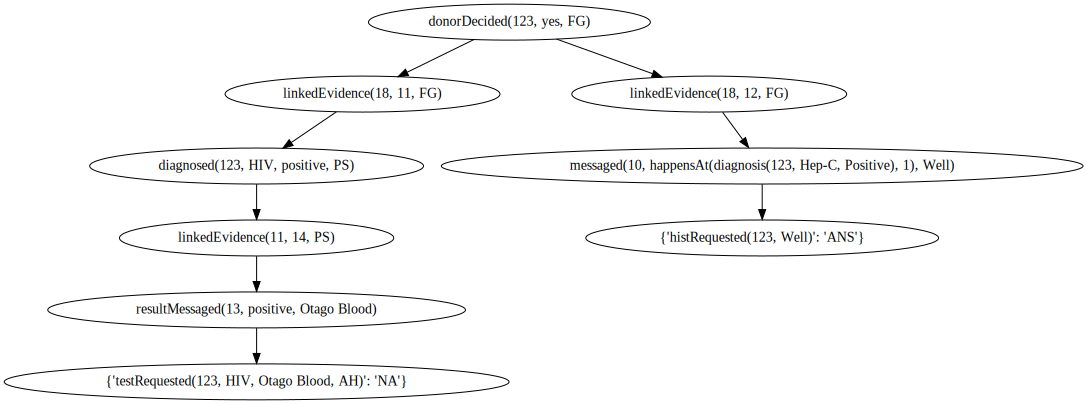

In [4]:
from IPython.display import SVG, display
display(SVG(filename='dia.svg'))


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9a9e692c-8284-4c1f-bb92-f37a509f555a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>